In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
station

sqlalchemy.ext.automap.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
session.query(measurement.date, measurement.prcp).order_by(measurement.date.desc()).first()

('2017-08-23', 0.0)

<AxesSubplot:xlabel='date'>

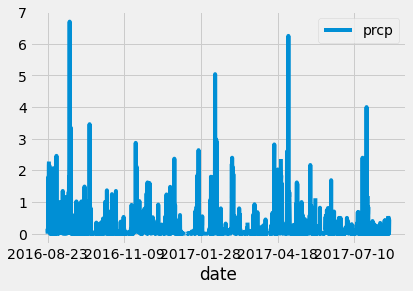

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
prcp_df = pd.DataFrame(session.query(measurement.date,measurement.prcp).\
    filter(measurement.date <= '2017-08-23').\
    filter(measurement.date >= '2016-08-23').\
    order_by(measurement.date).all()).set_index('date')
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df.plot(kind="line")

# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data




In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(func.count(station.station)).all()
total_stations

[(9,)]

In [28]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
most_active = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).first()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
max_temp = session.query(func.max(measurement.tobs)).\
     filter(measurement.station == most_active.station).all()
min_temp = session.query(func.min(measurement.tobs)).\
     filter(measurement.station == most_active.station).all()
ave_temp = session.query(func.avg(measurement.tobs)).\
     filter(measurement.station == most_active.station)


In [16]:
ave_temp.all()

[(71.66378066378067,)]

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_df = pd.DataFrame(session.query(measurement.date,measurement.tobs).\
    filter(measurement.date <= '2017-08-23').\
    filter(measurement.date >= '2016-08-23').\
    filter(measurement.station == most_active.station).\
    order_by(measurement.date).all()).set_index('date')

array([[<AxesSubplot:title={'center':'tobs'}>]], dtype=object)

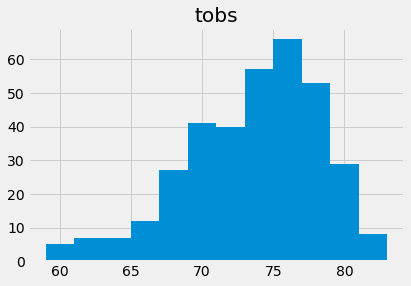

In [18]:
most_active_df.hist(bins=12)

# Close session

In [19]:
# Close Session
session.close()